### Personal Details:-
### Name: Prashanjit Basu
### Topic: Coursera Project

In [241]:
# Required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import os
os.chdir(r'D:\Datasets\Datasets-main')

In [242]:
df = pd.read_csv("titanic3.csv")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [244]:
df['pclass'].unique()

array([ 1.,  2.,  3., nan])

In [245]:
df['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

#### The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
##### Important features and their descreption:
##### survival: 0 = no, 1 = yes
##### pclass: 1 = 1st, 2 = 2nd, 3 = 3rd
##### name: self explanatory
##### sex: self explanatory
##### age: self explanatory
##### sibsp = nr of sibilings / spouses abroad
##### parch = nr of parents / children abroad
##### ticket = self explanatory
##### fare = passenger fare
##### cabin = self explanatory
##### embarked(port of embrarkation) = (C = Chernourg), (Q = Queenstown), (S = Southhampton)
##### boat = lifeboad (if survived)
##### body = body number (if not survive and body was recovered)
##### home.dest = self explanatory
##### survived = out target

In [246]:
def PercentageNull(column, data):
    perc = (data[column].isnull().sum() / data.shape[0])
    print(f"Percent of null values ''{column}'' records is {round(perc * 100,2)} %")
for col in df.columns:
    PercentageNull(col, df)

Percent of null values ''pclass'' records is 0.08 %
Percent of null values ''survived'' records is 0.08 %
Percent of null values ''name'' records is 0.08 %
Percent of null values ''sex'' records is 0.08 %
Percent of null values ''age'' records is 20.15 %
Percent of null values ''sibsp'' records is 0.08 %
Percent of null values ''parch'' records is 0.08 %
Percent of null values ''ticket'' records is 0.08 %
Percent of null values ''fare'' records is 0.15 %
Percent of null values ''cabin'' records is 77.48 %
Percent of null values ''embarked'' records is 0.23 %
Percent of null values ''boat'' records is 62.9 %
Percent of null values ''body'' records is 90.76 %
Percent of null values ''home.dest'' records is 43.13 %


In [247]:
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [248]:
#Removing features with high percentage of null values
df.drop(["cabin","boat","body","home.dest"], axis=1, inplace=True)

In [249]:
#Removing features that are irrevelavat to the survival of the passengers
df.drop(["name",'ticket'], axis=1, inplace=True)

In [250]:
df.isnull().sum()

pclass        1
survived      1
sex           1
age         264
sibsp         1
parch         1
fare          2
embarked      3
dtype: int64

In [251]:
df.dtypes

pclass      float64
survived    float64
sex          object
age         float64
sibsp       float64
parch       float64
fare        float64
embarked     object
dtype: object

In [252]:
#Replacing the null values in age and fare by median and by mode in embarked
df['age'].replace(np.nan,df['age'].median(),inplace=True)
df['fare'].replace(np.nan,df['fare'].median(),inplace=True)
df['embarked'].replace(np.nan,df['embarked'].mode()[0],inplace=True)

In [253]:
#We can drop the rest of the null rows
df = df.dropna()

In [254]:
df.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [255]:
stats_df = df.describe()
stats_df.loc['iqr'] = stats_df.loc['75%'] - stats_df.loc['25%']
stats_df.loc['u-bound'] = stats_df.loc['75%'] + 1.5*stats_df.loc['iqr']
stats_df.loc['l-bound'] = stats_df.loc['25%'] - 1.5*stats_df.loc['iqr']
out_fields = ['mean','25%','50%','75%', 'iqr', 'l-bound','min', 'u-bound','max']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,pclass,survived,age,sibsp,parch,fare
mean,2.294882,0.381971,29.503183,0.498854,0.385027,33.281086
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
median,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000
iqr,1.000000,1.000000,13.000000,1.000000,0.000000,23.379200
l-bound,0.500000,-1.500000,2.500000,-1.500000,0.000000,-27.173000
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
u-bound,4.500000,2.500000,54.500000,2.500000,0.000000,66.343800
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


<Axes: xlabel='age'>

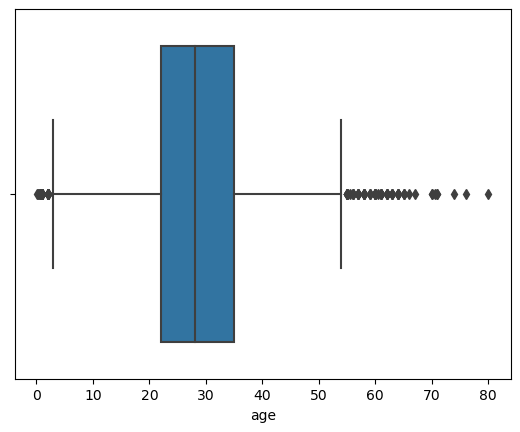

In [256]:
sns.boxplot(x="age",data=df)

<Axes: xlabel='sibsp'>

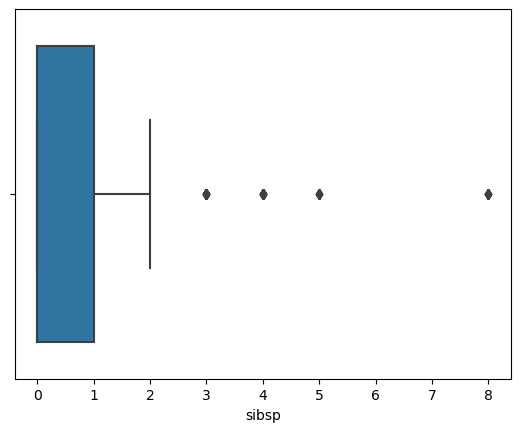

In [257]:
sns.boxplot(x="sibsp",data=df)

<Axes: xlabel='parch'>

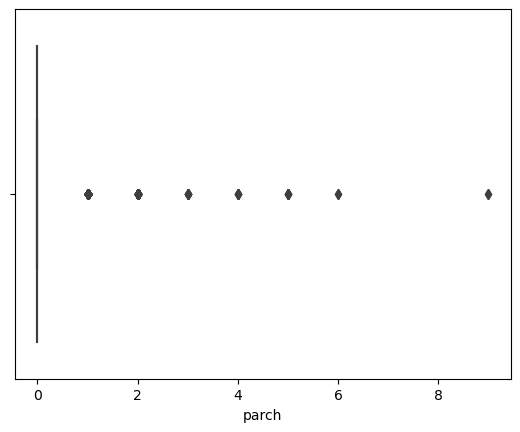

In [258]:
sns.boxplot(x="parch",data=df)

<Axes: xlabel='fare'>

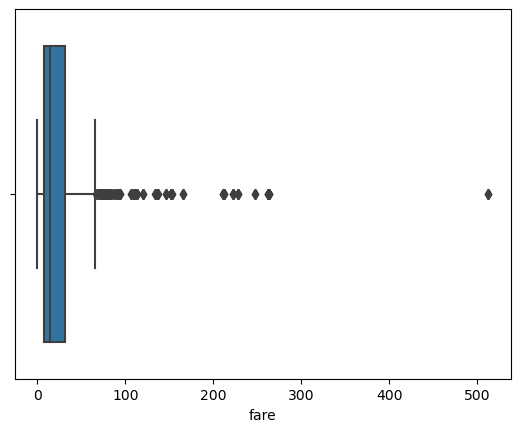

In [259]:
sns.boxplot(x="fare",data=df)

### Hypothesis testing 1:
### Null Hypothesis : There is no relationship between passenger survival and passenger class.
### Alternate Hypothesis : There is a relationship between passenger survival and passenger class.

In [260]:
from scipy.stats import chi2_contingency
significance_level=0.05
contingency_table = pd.crosstab(df['survived'], df['pclass'])
#Performing chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
if (p_value<significance_level):
    print("Null Hypothesis is rejected")
else:
    print("Null Hypothesis cannot be rejected")

Chi-square statistic: 127.85915643930328
P-value: 1.7208259588256052e-28
Null Hypothesis is rejected


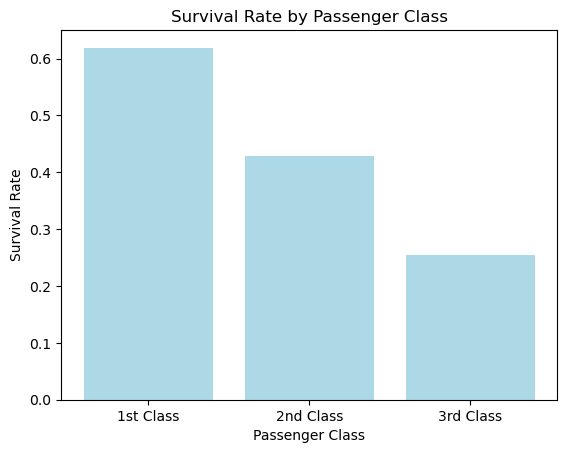

In [261]:
correlation = df.groupby('pclass')['survived'].mean()
labels = ['1st Class', '2nd Class', '3rd Class']
x = range(len(labels))
plt.bar(x, correlation, tick_label=labels, color='lightblue')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.show()

### Conclusion 1: There is a relationship between survival and passenger class

### Hypothesis testing 2:
### Null Hypothesis : There is no significant difference in the mean age between survivors and non-survivors.
### Alternate Hypothesis : There is a significant difference in the mean age between survivors and non-survivors.

In [262]:
from scipy.stats import ttest_ind
age_survived = df[df['survived'] == 1]['age']
age_not_survived = df[df['survived'] == 0]['age']
#Performing independent t-test
t_statistic, p_value = ttest_ind(age_survived, age_not_survived)
print("T-statistic:", t_statistic)
print("P-value:", p_value)
if (p_value<significance_level):
    print("Null Hypothesis is rejected")
else:
    print("Null Hypothesis cannot be rejected")

T-statistic: -1.5856387679455064
P-value: 0.11306317392614412
Null Hypothesis cannot be rejected


<Axes: xlabel='age', ylabel='count'>

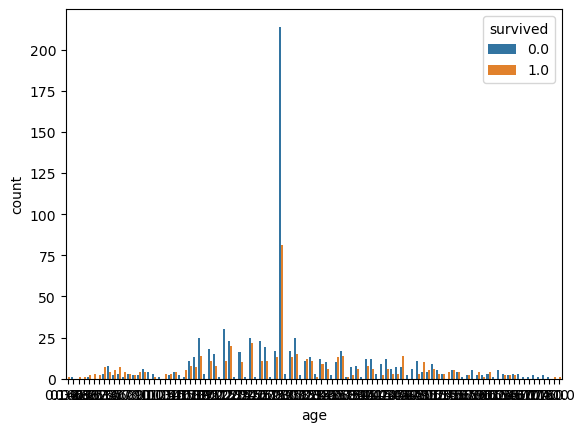

In [263]:
sns.countplot(x='age',hue='survived',data=df)

### Conclusion 2: There is no significant difference in the mean age between survivors and non-survivors.

### Hypothesis testing 3:
### Null Hypothesis : There is no association between gender and survival.
### Alternate Hypothesis : There is an association between gender and survival.

In [264]:
contingency_table = pd.crosstab(df['survived'], df['sex'])
# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
if (p_value<significance_level):
    print("Null Hypothesis is rejected")
else:
    print("Null Hypothesis cannot be rejected")

Chi-square statistic: 363.6179084388249
P-value: 4.589924936952945e-81
Null Hypothesis is rejected


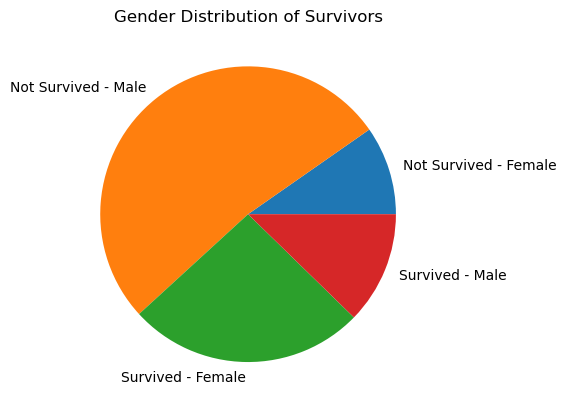

In [265]:
survived_gender = df.groupby(['survived', 'sex']).size().unstack()
labels = ['Not Survived - Female', 'Not Survived - Male', 'Survived - Female', 'Survived - Male']
plt.pie(survived_gender.values.flatten(), labels=labels)
plt.title('Gender Distribution of Survivors')
plt.show()

### Conclusion 3: There is an association between gender and survival

In [266]:
#Feature transforrmation
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['embarked'] = le.fit_transform(df['embarked'])
df = pd.get_dummies(columns=['sex'], data=df)
df.head()

,pclass,survived,age,sibsp,parch,fare,embarked,sex_female,sex_male
0,1.0,1.0,29.0000,0.0,0.0,211.3375,2,1,0
1,1.0,1.0,0.9167,1.0,2.0,151.5500,2,0,1
2,1.0,0.0,2.0000,1.0,2.0,151.5500,2,1,0
3,1.0,0.0,30.0000,1.0,2.0,151.5500,2,0,1
4,1.0,0.0,25.0000,1.0,2.0,151.5500,2,1,0


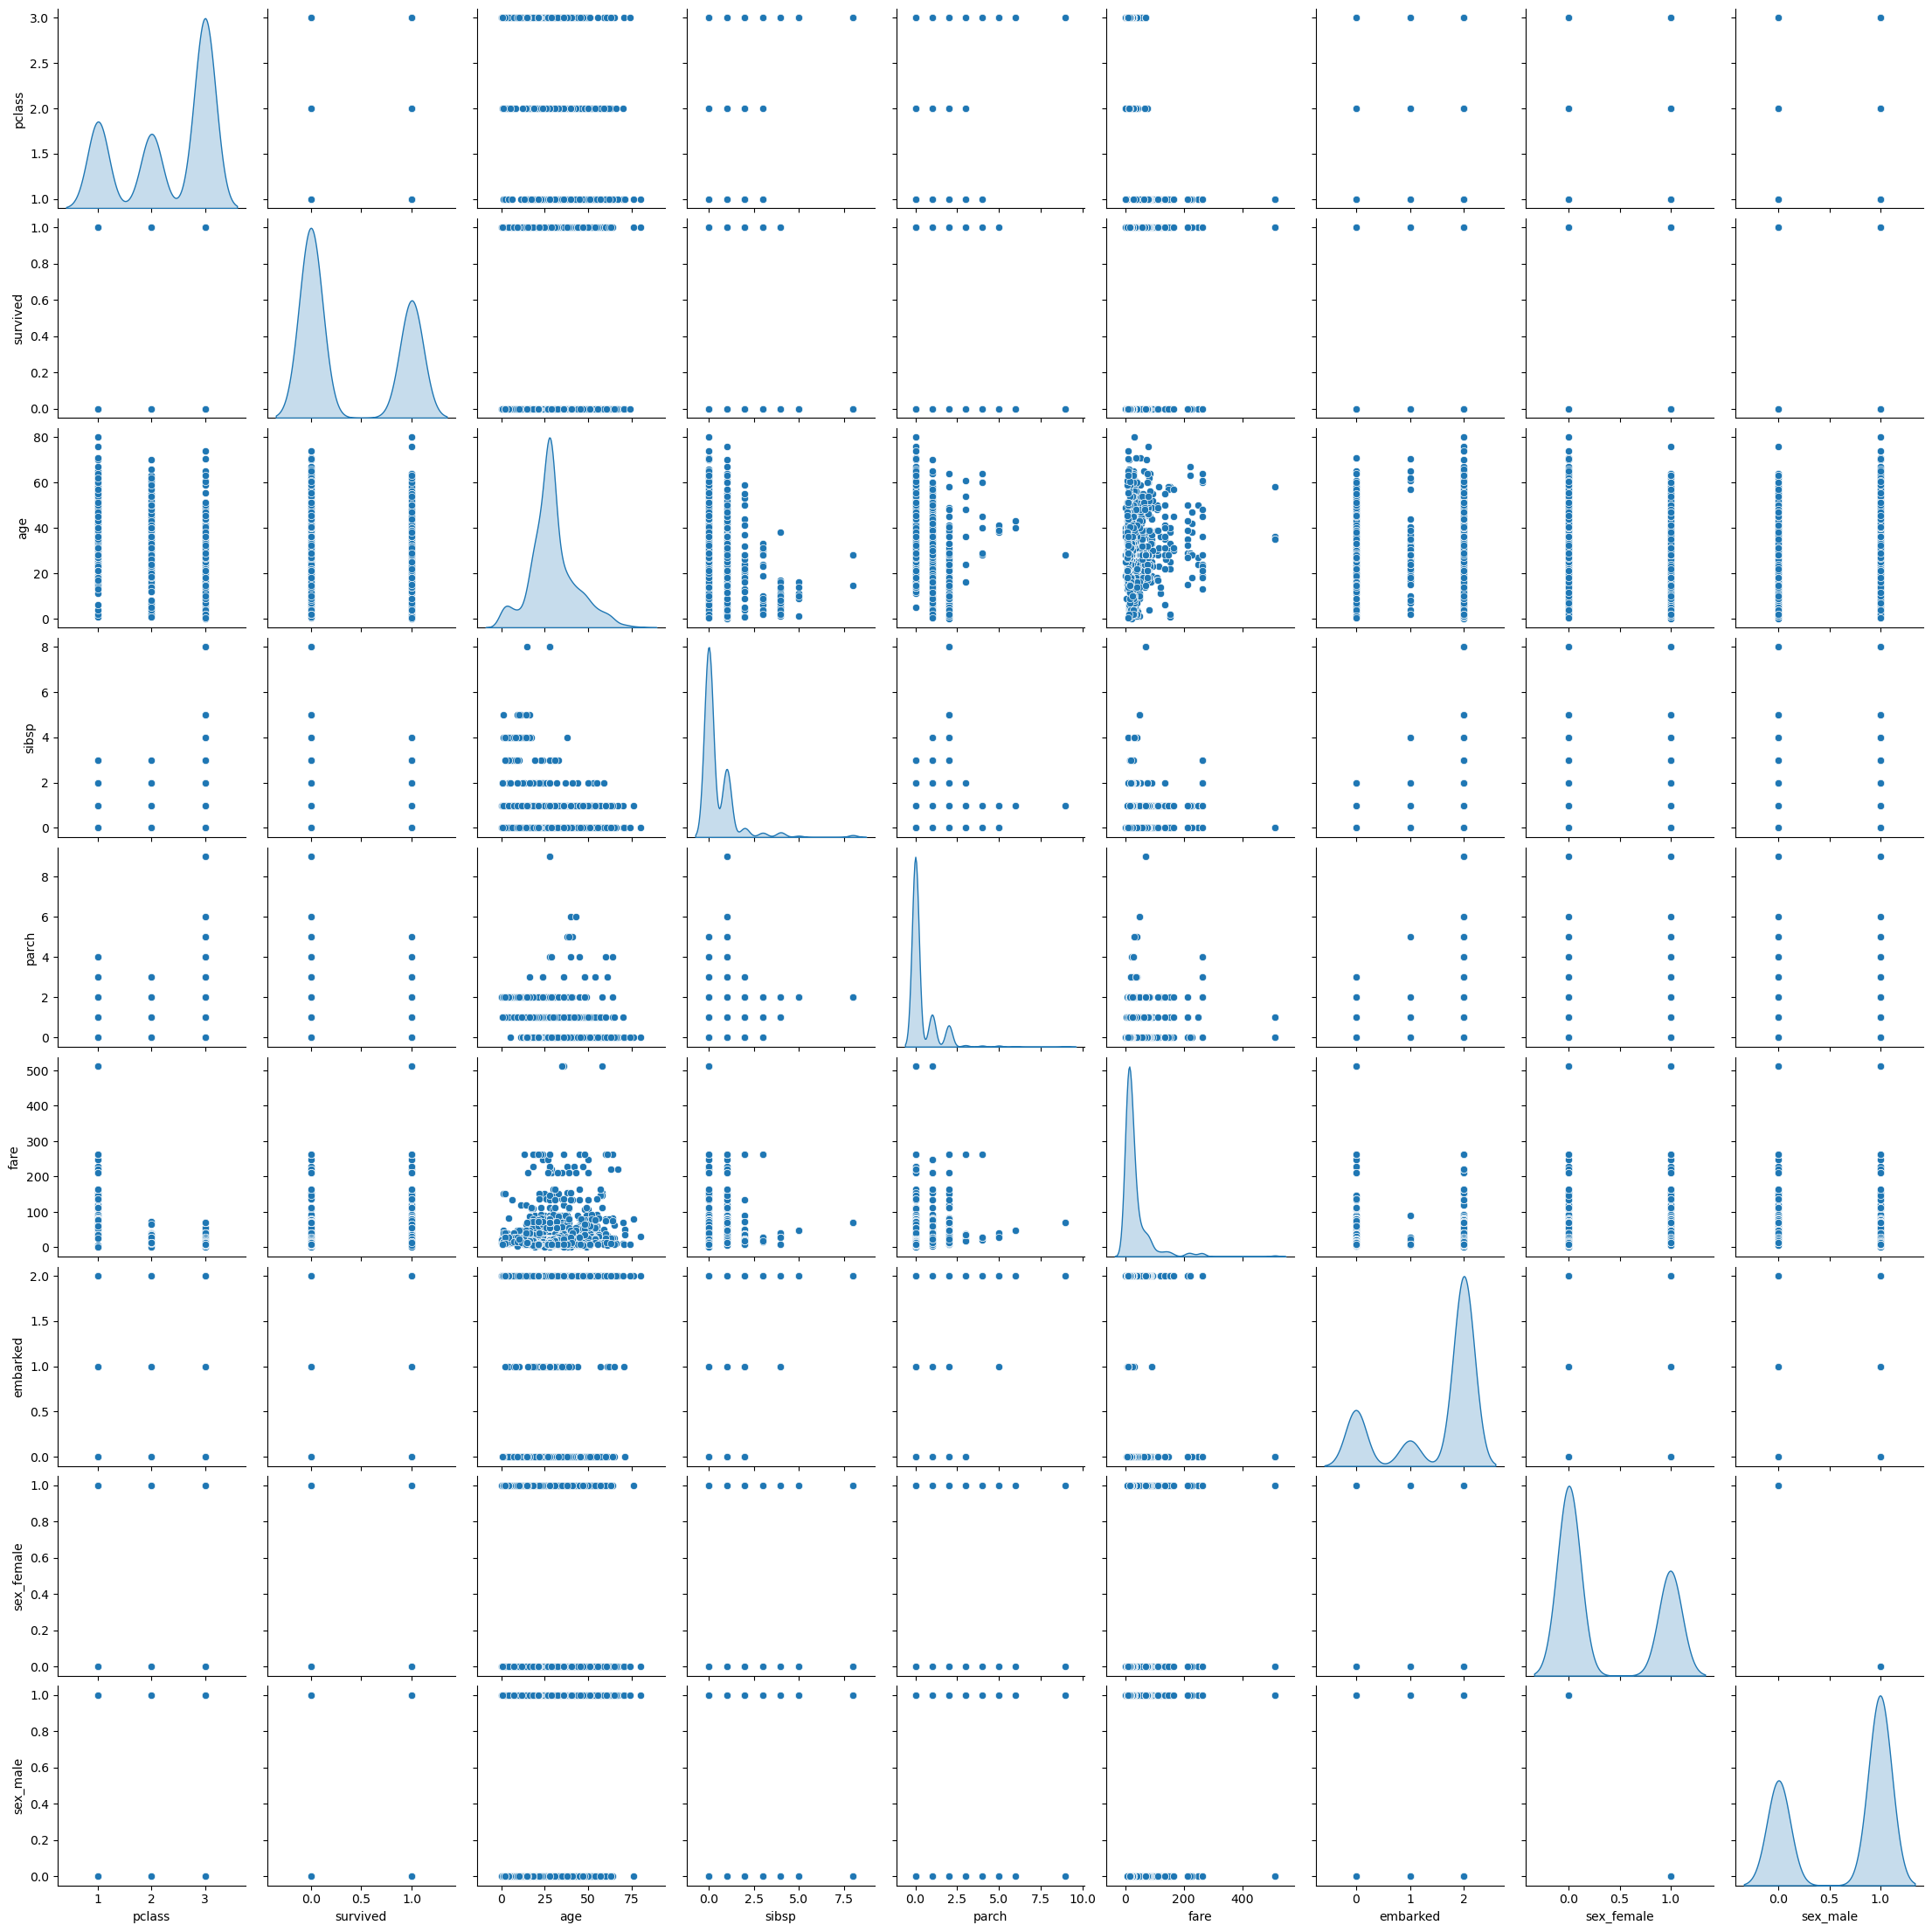

In [267]:
sns.pairplot(data=df, diag_kind='kde')

In [268]:
corr = df.corr()
corr

,pclass,survived,age,sibsp,parch,fare,embarked,sex_female,sex_male
pclass,1.000000,-0.312469,-0.377908,0.060832,0.018322,-0.558683,0.185479,-0.124617,0.124617
survived,-0.312469,1.000000,-0.043818,-0.027825,0.082660,0.244414,-0.175313,0.528693,-0.528693
age,-0.377908,-0.043818,1.000000,-0.189972,-0.125851,0.178182,-0.063423,-0.053664,0.053664
sibsp,0.060832,-0.027825,-0.189972,1.000000,0.373587,0.160349,0.065567,0.109609,-0.109609
parch,0.018322,0.082660,-0.125851,0.373587,1.000000,0.221635,0.044772,0.213125,-0.213125
fare,-0.558683,0.244414,0.178182,0.160349,0.221635,1.000000,-0.238131,0.185681,-0.185681
embarked,0.185479,-0.175313,-0.063423,0.065567,0.044772,-0.238131,1.000000,-0.097960,0.097960
sex_female,-0.124617,0.528693,-0.053664,0.109609,0.213125,0.185681,-0.097960,1.000000,-1.000000
sex_male,0.124617,-0.528693,0.053664,-0.109609,-0.213125,-0.185681,0.097960,-1.000000,1.000000


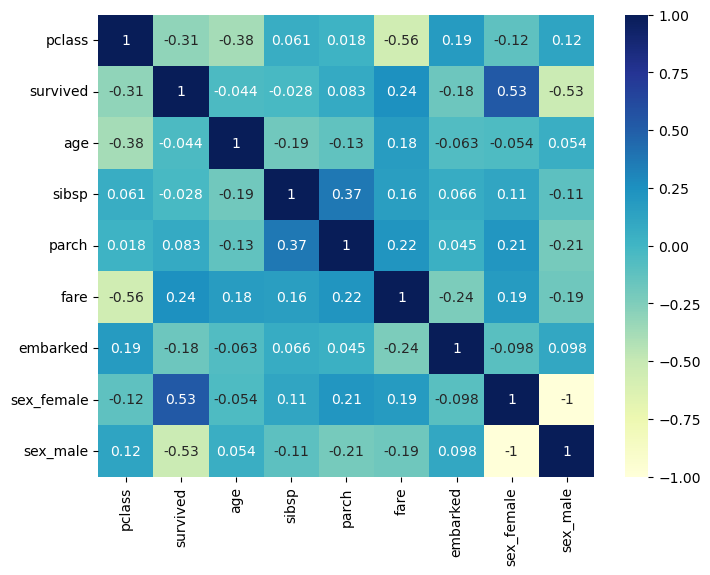

In [269]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

In [270]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

In [271]:
x = df.drop("survived", axis=1)
y = df['survived']

In [272]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [273]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [274]:
prediction = model.predict(x_test)
accuracy = accuracy_score(prediction,y_test)
accuracy

0.7938931297709924

In [275]:
print("Accuracy= "+ str(round(accuracy*100,2)) + "%")

Accuracy= 79.39%


#### The Titanic dataset is a well-known dataset that provides valuable insights but the main part it falls short is its amount of available data. It is a small dataset as compared to other decent datasets and hence it does affects the quality of the dataset. This could have been compensated by addition features like the health of passengers, their occupation, their education, etc. For instance, information about the passengers' occupations, family relationships, or cabin locations could provide further insights into their survival chances.